Text(0, 0.5, 'X2')

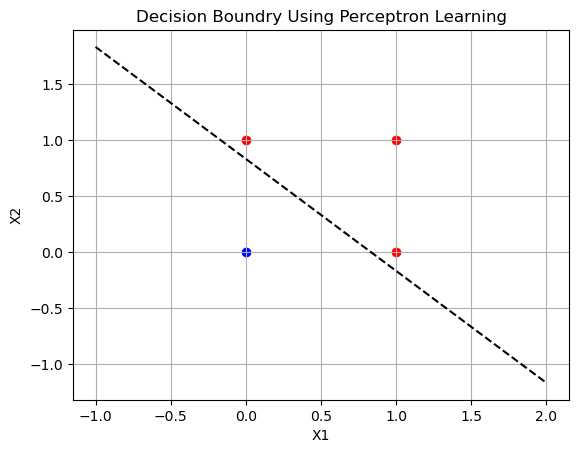

In [20]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]])
Y = np.array([[1],[0],[0],[0]])

class Perceptron():
    def __init__(self):
        self.weights = np.zeros(2)
        self.bias = 0.75

    def activation(self,x):
        return 1 if x>0 else 0
        

    def predict(self,x):
        return self.activation(np.dot(x,self.weights) + self.bias)

    def train(self,X,Y,lr=0.1,epoch=10):
        for _ in range(epoch):
            for xi,target in zip(X,Y):
                pred = self.predict(xi)
                error = target - pred
                self.weights += lr * error * xi
                self.bias += lr * error

#training of model
model = Perceptron()
model.train(X,Y)

#Plotting
for i in range(len(X)):
    color = 'red' if Y[i]==0 else 'blue'
    plt.scatter(X[i][1],X[i][0] , color=color)


#plot decision boundry
x_vals = np.array([X[:,0].min()-1, X[:,0].max()+1])
y_vals = (-model.weights[0] * x_vals - model.bias) / model.weights[1]
plt.plot(x_vals,y_vals,'k--', label = 'Decision Boundary')


plt.title("Decision Boundry Using Perceptron Learning")
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")
        

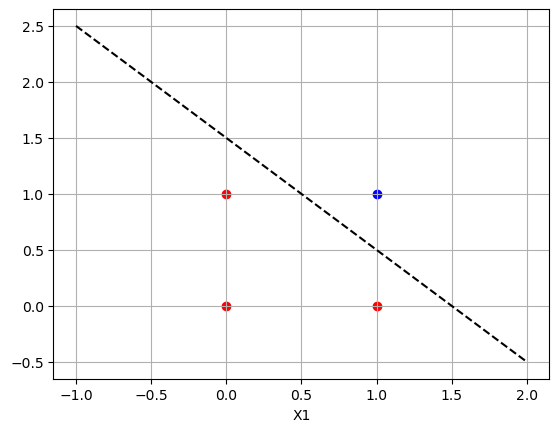

In [39]:
#Decision Boundary using perceptron
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]])
Y = np.array([[1],[1],[1],[0]])

class Perceptron():
    def __init__(self):
        self.weights = np.zeros(2)
        self.bias = 0.75

    def activation(self,x):
        return 1 if x>=0 else 0

    def predict(self,x):
        return self.activation(np.dot(x,self.weights) + self.bias)

    def train(self,X,Y,lr=0.1,epoch=10):
        for _ in range(epoch):
            for xi, target in zip(X,Y):
                pred = self.predict(xi)
                error = target - pred
                self.weights += lr * error * xi
                self.bias += lr * error
#training model
model = Perceptron()
model.train(X,Y)

#plotting
for i in range(len(X)):
    color = 'red' if Y[i]== 1 else 'blue'
    plt.scatter(X[i][0],X[i][1], color = color)

#ploting decision boundary
x_vals = np.array([X[:,0].min()-1, X[:,0].max()+1])
y_vals = (-model.weights[0] * x_vals - model.bias) / model.weights[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
plt.xlabel("X1")
plt.grid(True)

In [47]:
#XOR function and Forward & Backward Propogation
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]])
Y = np.array([[0],[1],[1],[0]])

np.random.seed(42)
input_layer_size = 2
hidden_layer_size = 4
output_layer_size = 1

# weights 
weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)

#bias
bias_hidden = np.random.rand(1, hidden_layer_size)
bias_output = np.random.rand(1, output_layer_size)

#epoch and learning rate
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    #    .......Forward propogation .........
    #Hidden layer
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    #output layer
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    #  .......Backward Propogation ........
    #error calculation
    error = Y - final_output
    d_output = error * sigmoid_derivative(final_output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    #weights and bias updation
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output,axis = 0,keepdims = True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden,axis = 0,keepdims = True) * learning_rate

    if epoch%1000 ==0:
        loss = np.mean(np.square(error))
        print(f"Epoch:{epoch} Loss:{loss:.4f}")

print("The final output after training is :")
print(final_output.round(3))

Epoch:0 Loss:0.3855
Epoch:1000 Loss:0.2395
Epoch:2000 Loss:0.1898
Epoch:3000 Loss:0.1314
Epoch:4000 Loss:0.0460
Epoch:5000 Loss:0.0168
Epoch:6000 Loss:0.0088
Epoch:7000 Loss:0.0056
Epoch:8000 Loss:0.0040
Epoch:9000 Loss:0.0031
The final output after training is :
[[0.05 ]
 [0.947]
 [0.957]
 [0.051]]


In [52]:
#Andnot function using Mc Culloch Pitts
import numpy as np

X1 = [0,0,1,1]
X2 = [0,1,0,1]
W1 = 1
W2 = 1
T = 0.8

def McCullochPitts(X1,X2,W1,W2,T):
    andgate = []
    for i in range(len(X1)):
        X = X1[i]*W1 + X2[i]*W2
        activation = 1/(1+np.exp(-X))
        if activation>T:
            andgate.append(1)
        else:
            andgate.append(0)

    notgate = []
    for i in range(len(andgate)):
        if andgate[i] ==1:
            notgate.append(0)
        else:
            notgate.append(1)
    return notgate
    



In [53]:
McCullochPitts(X1,X2,W1,W2,T)

[1, 1, 1, 0]